In [2]:
!pip install scikit-learn

You should consider upgrading via the 'C:\Users\syj43\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
import pandas as pd
vdf = pd.read_excel('노드간통행속도집계_encoded.xlsx', sheet_name='노드간통행속도집계')
vdf.head()

,출발노드주소,도착노드주소,평균속도
0,강원도,경기도,101.0
1,강원도,충청북도,92.0
2,경기도,강원도,100.0
3,경기도,경상남도,97.0
4,경기도,광주광역시,93.5


In [6]:
# label encoding of addresses
lEncoder = LabelEncoder()
vdf['출발노드번호'] = lEncoder.fit_transform(vdf['출발노드주소'])
vdf['도착노드번호'] = lEncoder.fit_transform(vdf['도착노드주소'])
vdf.head()

,출발노드주소,도착노드주소,평균속도,출발노드번호,도착노드번호
0,강원도,경기도,101.0,0,1
1,강원도,충청북도,92.0,0,15
2,경기도,강원도,100.0,1,0
3,경기도,경상남도,97.0,1,2
4,경기도,광주광역시,93.5,1,4


In [17]:
import numpy as np

In [15]:
ad = vdf['출발노드주소'].values.tolist()
ad.extend(vdf['도착노드주소'].values)
adSet = set(ad)
adSet

{'강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '충청남도',
 '충청북도'}

In [16]:
len(adSet)

16

In [18]:
# arrange the columns
vdf = vdf.iloc[:,[0,3,1,4,2]]
vdf.head()

,출발노드주소,출발노드번호,도착노드주소,도착노드번호,평균속도
0,강원도,0,경기도,1,101.0
1,강원도,0,충청북도,15,92.0
2,경기도,1,강원도,0,100.0
3,경기도,1,경상남도,2,97.0
4,경기도,1,광주광역시,4,93.5


In [19]:
# to csv
vdf.to_csv('labelEncodingProvinces.csv',encoding='cp949')

In [27]:
vdf['평균속도정수'] = vdf['평균속도'].apply(lambda x:int(x))
vdf.head()

,출발노드주소,출발노드번호,도착노드주소,도착노드번호,평균속도,평균속도정수
0,강원도,0,경기도,1,101.0,101
1,강원도,0,충청북도,15,92.0,92
2,경기도,1,강원도,0,100.0,100
3,경기도,1,경상남도,2,97.0,97
4,경기도,1,광주광역시,4,93.5,93


In [29]:
# to become compatible with R, add one to the index columns
# then it ranges from 1 to 16
vdf['출발노드번호'] = vdf['출발노드번호'].apply(lambda x:x+1)
vdf['도착노드번호'] = vdf['도착노드번호'].apply(lambda x:x+1)

In [30]:
# zip the three numerical columns
labelZip = zip(vdf['출발노드번호'],vdf['도착노드번호'],vdf['평균속도정수'])
list(labelZip)

[(1, 2, 101),
 (1, 16, 92),
 (2, 1, 100),
 (2, 3, 97),
 (2, 5, 93),
 (2, 7, 100),
 (2, 9, 73),
 (2, 12, 96),
 (2, 13, 105),
 (2, 14, 85),
 (2, 15, 91),
 (2, 16, 95),
 (3, 1, 84),
 (3, 2, 98),
 (3, 4, 100),
 (3, 6, 96),
 (3, 8, 90),
 (3, 11, 91),
 (3, 13, 92),
 (3, 14, 104),
 (4, 3, 97),
 (4, 6, 100),
 (4, 7, 69),
 (4, 11, 95),
 (4, 16, 97),
 (5, 2, 93),
 (5, 7, 77),
 (5, 13, 91),
 (6, 3, 92),
 (6, 4, 98),
 (7, 2, 71),
 (7, 4, 74),
 (7, 5, 77),
 (7, 10, 92),
 (7, 13, 98),
 (7, 15, 93),
 (7, 16, 96),
 (8, 3, 92),
 (8, 11, 99),
 (9, 2, 73),
 (10, 7, 95),
 (10, 15, 105),
 (11, 3, 89),
 (11, 4, 101),
 (11, 8, 103),
 (12, 2, 93),
 (12, 13, 68),
 (13, 2, 100),
 (13, 3, 93),
 (13, 5, 95),
 (13, 7, 99),
 (13, 14, 103),
 (14, 2, 70),
 (14, 3, 105),
 (14, 13, 100),
 (14, 15, 99),
 (15, 2, 100),
 (15, 7, 93),
 (15, 10, 103),
 (15, 14, 104),
 (15, 16, 99),
 (16, 1, 104),
 (16, 2, 92),
 (16, 4, 96),
 (16, 7, 96),
 (16, 15, 93)]

In [33]:
# closeness df
cdf = pd.read_csv('closenessVel.csv')
cdf.head()

,node,closeness,n.closeness,m.closeness
0,1,0.032253,0.002150,0.483794
1,2,0.050477,0.003365,0.757157
2,3,0.044633,0.002976,0.669501
3,4,0.036170,0.002411,0.542551
4,5,0.032304,0.002154,0.484557


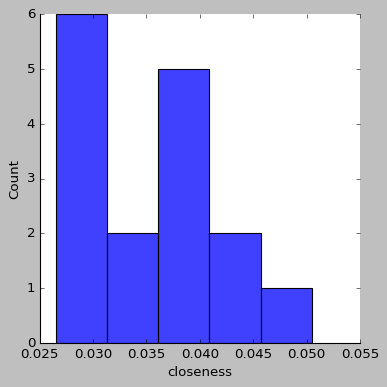

In [38]:
# check the distribution of closeness
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(cdf['closeness'])
plt.show()

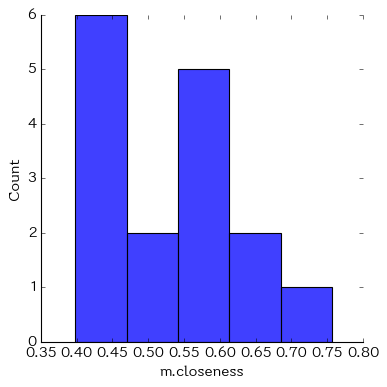

In [62]:
sns.displot(cdf['m.closeness'])
plt.show()

In [39]:
# heatmap example with data from seaborn
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [40]:
flights.shape

(144, 3)

In [48]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = '1'

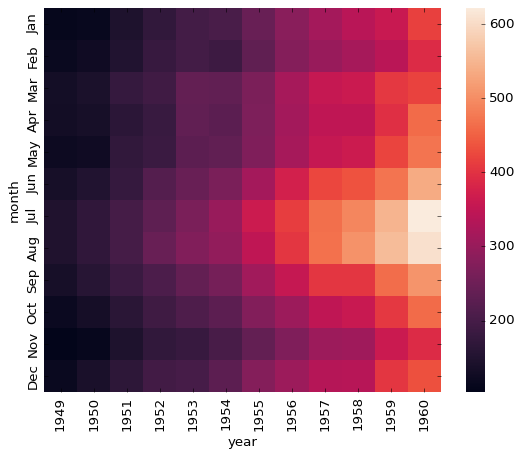

In [49]:
flights_pivot = flights.pivot(index='month',columns='year',values='passengers')
sns.heatmap(data=flights_pivot)
plt.show()

In [53]:
import matplotlib.font_manager as fm
# fm.fontManager.addfont('BinggraeII-Bold.ttf')
fm.fontManager.addfont('BinggraeII.ttf')

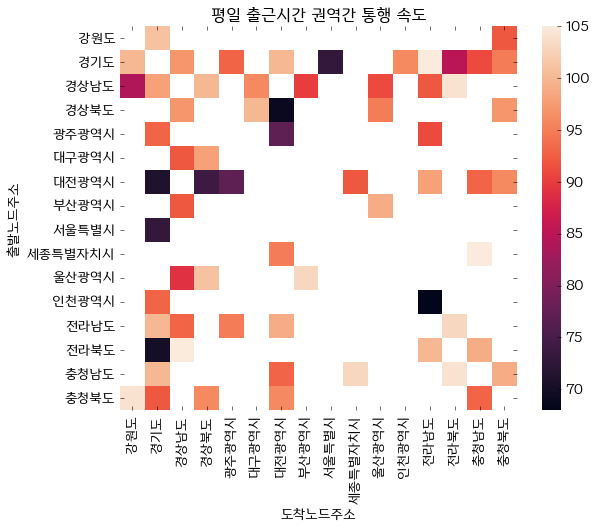

In [58]:
velPivot = vdf.pivot(index='출발노드주소',columns='도착노드주소',values='평균속도정수')
fig, ax = plt.subplots()
mpl.rcParams["font.family"] = 'Binggrae?'
sns.heatmap(data=velPivot) #annot=True
ax.set(title="평일 출근시간 권역간 통행 속도")
plt.show()

In [59]:
fig.savefig('평일출근시간권역간통행속도.png',bbox_inches='tight')

In [60]:
import networkx as nx

In [61]:
edgeList = zip(vdf['출발노드주소'].values,vdf['도착노드주소'].values)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(11,7))
mpl.rcParams["font.family"] = 'Binggrae?'
cmapTraffic = plt.cm.Blues
cmapVelocity = plt.cm.RdYlGn
# network
G = nx.Graph()
G.add_nodes_from(adSet)
G.add_edges_from(list(edgeList))
# adjust nodes' position
pos = {'경기도':(300,1050),'인천광역시':(200,1050),'서울특별시':(300,1200),'경상남도':(300,100),'충청남도':(-150,800),'충청북도':(400,700),'대전광역시':(200,400),
       '울산광역시':(750,350),'부산광역시':(600,100),'전라북도':(-150,300),'전라남도':(0,100),'강원도':(700,1100),
       '광주광역시':(0,400),'세종특별자치시':(-50,1100),'경상북도':(750,850),'대구광역시':(600,400)}
# pos = nx.circular_layout(G)
nx.draw_networkx(G, with_labels=True, pos=pos, ax=ax, font_size=10, node_size=cdf['m.closeness'], 
                 font_family='Binggrae?', edge_color=vdf['평균속도'].values, width=3, edge_cmap=cmapVelocity,
                 node_color=cdf['m.closeness'], cmap=cmapTraffic)
# add color bars
norm = mpl.colors.Normalize(vmin=, vmax=1200)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmapTraffic),
             ax=ax, orientation='vertical', label='하루 평균 교통량 (천)', fraction=0.07, pad=0.05, location='left')
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# cax = inset_axes(ax, width="100%", height="6%", loc='lower left')
# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlGnBu),
#              ax=ax, orientation='horizontal', label='하루 평균 교통량 (천)', cax=cax)

norm2 = mpl.colors.Normalize(vmin=70, vmax=105)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=cmapVelocity),
             ax=ax, orientation='vertical', label='오전 7시 평균 통행 속도 (km/h)')
# add textboxes
font = {"fontname": "Binggrae?", "color": "white", "fontsize": 12, "fontweight": "extra bold"}
ax.text(
    0.5,
    0.83,
    "경인·서울",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# remove the frame from the fig
plt.tick_params(axis='x', which='both', bottom=False, 
                top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, 
                left=False, labelleft=False) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
plt.title('전국 고속도로 네트워크', fontsize=18)
plt.margins(0.1,0.1)
plt.show()

In [77]:
# method to map
def idxToProvince(argument):
	switcher = {
        1:'강원도',
        2:'경기도',
        3:'경상남도',
        4:'경상북도',
        5:'광주광역시',
        6:'대구광역시',
        7:'대전광역시',
        8:'부산광역시',
        9:'서울특별시',
        10:'세종특별자치시',
        11:'울산광역시',
        12:'인천광역시',
        13:'전라남도',
        14:'전라북도',
        15:'충청남도',
        16:'충청북도'
	}
	return switcher.get(argument, "na")

In [78]:
# edgeList; list of tuples
provEdge = [(1,2),(1,4),(1,16),
            (2,1),(2,9),(2,12),(2,15),(2,16),
            (3,13),(3,14),(3,4),(3,6),(3,11),(3,8),
            (4,1),(4,16),(4,14),(4,6),(4,3),(4,11),
            (5,13),
            (6,4),(6,3),
            (7,10),(7,15),(7,16),
            (8,11),(8,3),
            (9,2),(9,12),
            (10,15),(10,16),(10,7),
            (11,4),(11,3),(11,8),
            (12,9),(12,2),
            (13,5),(13,3),(13,14),
            (14,15),(14,16),(14,4),(14,3),(14,13),
            (15,2),(15,16),(15,10),(15,7),(15,14),
            (16,1),(16,2),(16,15),(16,10),(16,7),(16,14),(16,4)
           ]

In [79]:
probEdgeLabeled = [(idxToProvince(pair[0]),idxToProvince(pair[1])) for pair in provEdge]

In [81]:
G = nx.from_edgelist(probEdgeLabeled)

In [83]:
import matplotlib.font_manager as fm
fm.fontManager.addfont('BinggraeII.ttf')

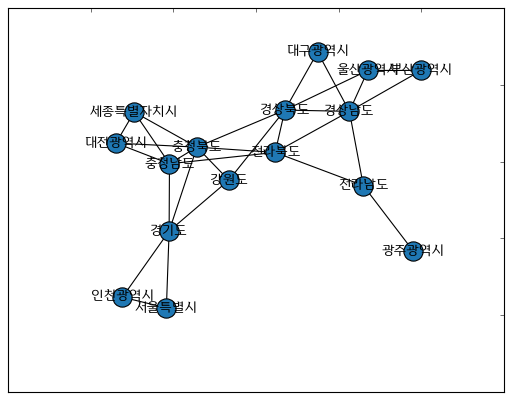

In [84]:
nx.draw_networkx(G,font_family='Binggrae?')

In [85]:
# similarly,
def idxToMunicipality(argument):
	switcher = {
        1:'거제시',
        2:'거창군',
        3:'고성군',
        4:'김해시',
        5:'남해군',
        6:'밀양시',
        7:'사천시',
        8:'산청군',
        9:'양산시',
        10:'의령군',
        11:'진주시',
        12:'창녕군',
        13:'창원시',
        14:'통영시',
        15:'하동군',
        16:'함안군',
        17:'함양군',
        18:'합천군'
	}
	return switcher.get(argument, "na")

In [86]:
muniEdge = [(1,13),(1,14),(1,7),
           (2,17),(2,8),(2,18),
            (3,13),(3,11),(3,7),(3,14),
            (4,9),(4,6),(4,13),
            (5,7),(5,15),
            (6,12),(6,13),(6,4),(6,9),
            (7,3),(7,11),(7,15),(7,5),
            (8,18),(8,2),(8,17),(8,15),(8,11),(8,10),
            (9,6),(9,4),
            (10,12),(10,18),(10,8),(10,11),(10,16),
            (11,10),(11,8),(11,15),(11,7),(11,3),(11,13),(11,16),
            (12,18),(12,10),(12,16),(12,13),(12,6),
            (13,4),(13,6),(13,12),(13,16),(13,11),(13,3),(13,1),
            (14,3),(14,1),(14,13),
            (15,7),(15,11),(15,8),(15,17),(15,5),
            (16,13),(16,12),(16,10),(16,11),
            (17,2),(17,8),(17,15),
            (18,12),(18,10),(18,8),(18,2)
           ]

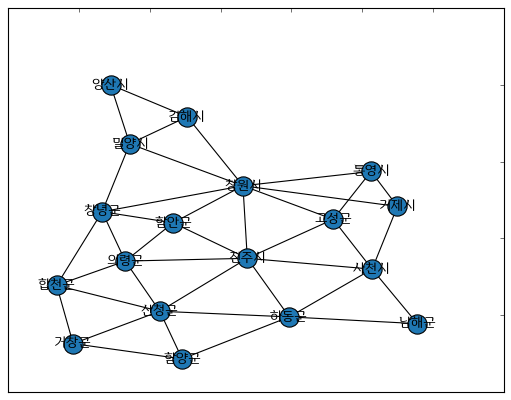

In [87]:
muniEdgeLabeled = [(idxToMunicipality(pair[0]),idxToMunicipality(pair[1])) for pair in muniEdge]
H = nx.from_edgelist(muniEdgeLabeled)
nx.draw_networkx(H,font_family='Binggrae?')